Bagging: Healthcare – Predicting Patient Readmission 

A hospital wants to predict whether patients are likely to be readmitted within 30 days of discharge. They have historical data about patients, including: 

Age 

BMI (Body Mass Index) 

Blood_Pressure (average systolic reading) 

Days_Hospitalized 

Satisfaction_Score (post-discharge survey rating) 

Readmitted (Yes/No) 

In [5]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("healthcare_readmission_500.csv")

In [7]:
print(df.head())

  Patient_ID  Age   BMI  Blood_Pressure  Days_Hospitalized  \
0    PAT1000   63  30.1             139                  3   
1    PAT1001   76  40.0             118                  4   
2    PAT1002   53  30.3             143                 18   
3    PAT1003   39  32.5             153                 13   
4    PAT1004   67  31.8             144                 19   

   Satisfaction_Score Readmitted  
0                 4.7         No  
1                 1.9        Yes  
2                 2.6        Yes  
3                 1.6        Yes  
4                 5.0        Yes  


In [8]:


X = df[['Age', 'BMI', 'Blood_Pressure', 'Days_Hospitalized', 'Satisfaction_Score']]
y = df['Readmitted'].str.strip().str.lower().eq('yes').astype(int)


In [9]:

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [10]:


base_tree = DecisionTreeClassifier(
    max_depth=6,          
    min_samples_leaf=3,  
    random_state=42
)

clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=50,      
    max_samples=0.9,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

In [11]:



clf.fit(Xtrain, ytrain)


,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,max_samples,0.9
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [12]:


y_pred = clf.predict(Xtest)


In [13]:

print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       106
           1       0.93      0.84      0.88        44

    accuracy                           0.93       150
   macro avg       0.93      0.91      0.92       150
weighted avg       0.93      0.93      0.93       150

Confusion Matrix:
 [[103   3]
 [  7  37]]


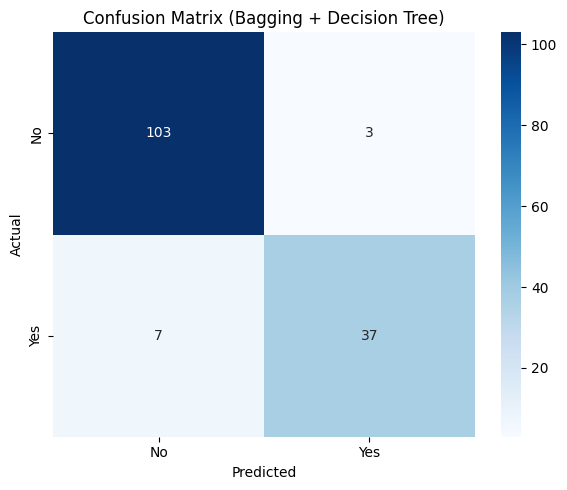

In [14]:


cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['No', 'Yes'],
    yticklabels=['No', 'Yes']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Bagging + Decision Tree)")
plt.tight_layout()
plt.show()


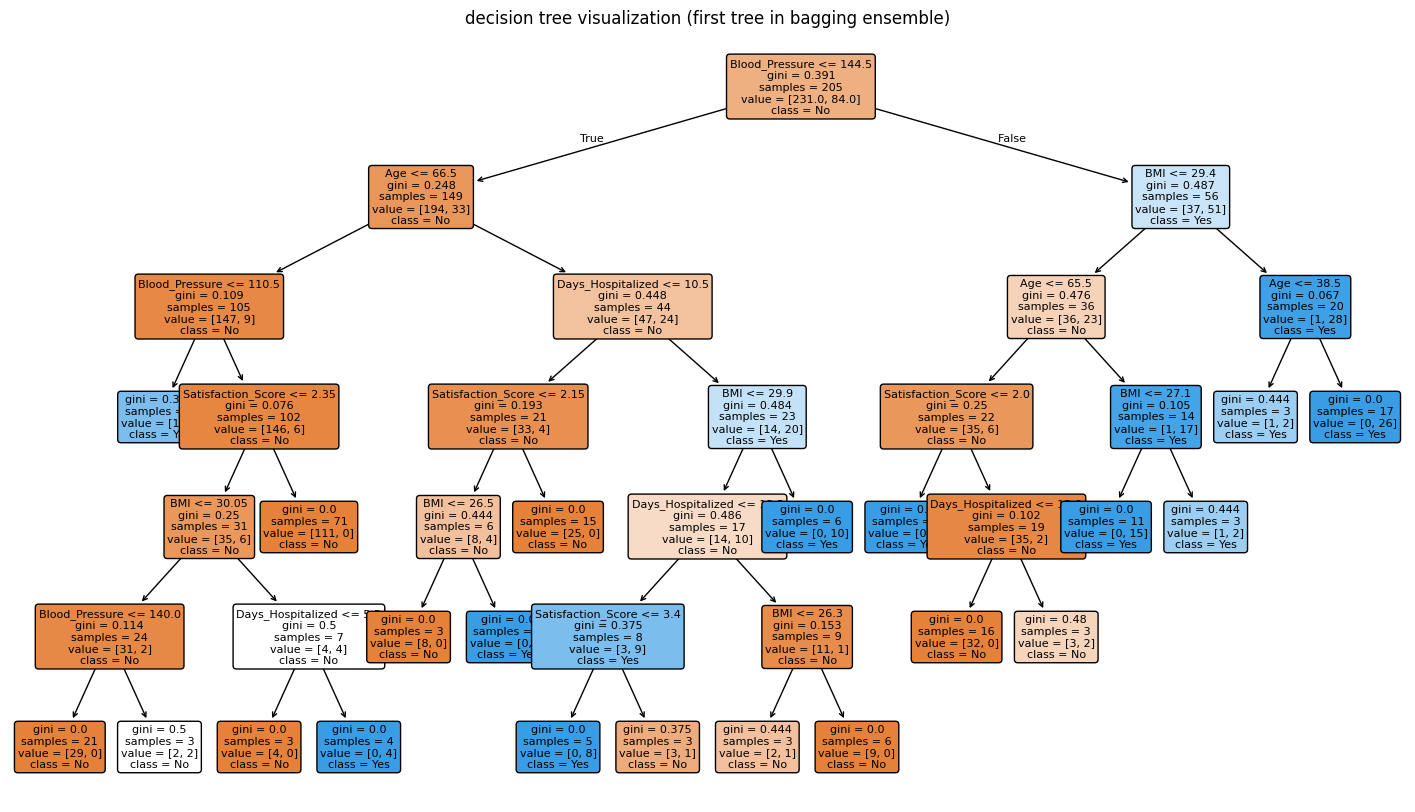

In [15]:


plt.figure(figsize=(18, 10))
plot_tree(
    clf.estimators_[0],
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("decision tree visualization (first tree in bagging ensemble)")
plt.show()
